# Vecindarios y convolución

Procesamiento de imágenes por vecindario significa modificar el valor de un pixel, utilizando la información de los pixeles vecinos.

$\Leftarrow$ añadir figura de la matriz.

LAs operaciones que se realizan para un procesamiento por vecindario, normalmente siguen los siguientes pasos: Sea $A \in {\rm I\!R}^{m\times n}$ una imgen a escala de grises.

1.
1. Desarrollar una operación que involucra solo los pixeles del vecindario: $A_{x-1, y}, A_{x, y-1}, ...$
1. Aplicar el resultado de la operación del pixel en la misma coordenada $(x,y)$ de la imagen de salida. $B_{x,y}$

## Convolución en 1 dimensión para venctores de dimensión finita:

Sea $X = [x_1, x_2, ..., x_n]$ y sesa $y = [y_1, y_2, ... , y_n]$ 
Entonces la convolución de X y Y es el vector Z de tamaño $m+n-1$, definido:
$$
Z(i) = (x\star y)(i) = \sum _j x(j)\cdot y(i-j+1)
$$
donde $j \in {max(1, i+1-n), ... ,min(i, n)}$

In [ ]:
%Ejemplo de Convolucion en 1D

x = [-2 1 2]; m = length(x);
y = [-4 3 4]; n = length(y);

z = zeros(m+n-1, 1); %Vector de convlucion


for i=1 : m+n-1 %Recorrer cada una de las entradas de Z
    for j=max([1 i+1-n]) : min([i m]) %Realizar la suma de la formula de convolucion
        z(i) = z(i) + x(j) * y(i-j+1);
    end
end

display(z);

In [ ]:
%Ejemplo de Convolucion en 1D


x = rand(250,1); m = length(x);
y = rand(100,1); n = length(y);

z = zeros(m+n-1, 1); %Vector de convlucion
tic
for i=1 : m+n-1 %Recorrer cada una de las entradas de Z
    for j=max([1 i+1-n]) : min([i m]) %Realizar la suma de la formula de convolucion
        z(i) = z(i) + x(j) * y(i-j+1);
    end
end
t1 = toc

tic
z2 = conv(x,y);
t2 = toc

In [ ]:
pkg load image

% A = imread("images/baby_yoda.jpg")
A = imread("images/Columnas.jpg");
subplot(1,2,1)
imshow(A)
title("Imagen Original")

%Mascara del Filtro promedio
k = 3
B = (1/(k^2))*ones(k); %ones
A = double(A);
C = conv(A,B,'same');
C = uint8(C);

%Mostrar el resultado
subplot(1,2,2)
imshow(C)
title("Filtro Promedio")

In [ ]:
pkg load image

A = imread("images/baby_yoda.jpg")
subplot(1,2,1)
imshow(A)
title("Imagen Original")

%Mascara del Filtro promedio
k = 3
B = (1/k^2)*ones(k); %ones
A = double(A);
for i=1:50
    A=conv2(A,B,"same");
end
C = A;
C = uint8(C);
subplot(1,2,2)
imshow(C)
title("Filtro Promedio")

Tarea. Aplicar el filtro promedio con una mascara de tamaño 3x3 a la imagen a color "barbara.jpg" de la Parte 1 de la Tarea.
Tarea. Implementar el filtro gausiano a la imagen "baby_yoda.jpg"

In [ ]:
pkg load image

A = imread("images/Columnas.jpg");
subplot(1,2,1)
imshow(A)
title("Imagen Original")

%Calcular el Laplaciano
% B = [1 0 1;0 -4 0;1 0 1];
B = [1 1 1;1 -8 1;1 1 1];
A = double(A);

%Realizar la convolucion
C = conv2(A,B,'same');
C = uint8(C);

%mostrar el laplaciano
subplot(1,2,2)
imshow(C)
title("Laplaciano")

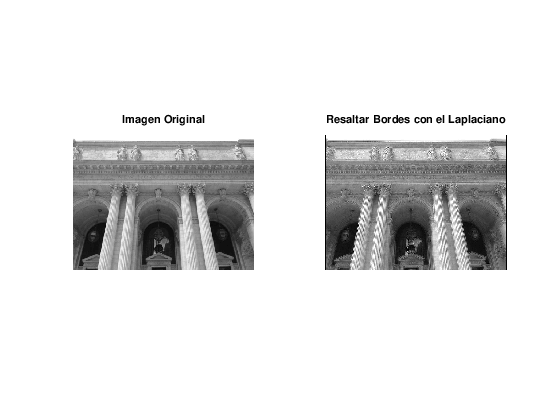

In [2]:
pkg load image

A = imread("images/Columnas.jpg");
subplot(1,2,1)
imshow(A)
title("Imagen Original")

%Calcular el Laplaciano

B = [1 1 1;1 -8 1;1 1 1];
A = double(A);

%Realizar la convolucion
C = conv2(A,B,'same'); %Detectar los bordes de la imagen A
alpha = 0.5;
D = A+alpha*C; %Enfatizar los bordes de la imagen A
D = uint8(D);

%mostrar el laplaciano
subplot(1,2,2)
imshow(D)
title("Resaltar Bordes con el Laplaciano")

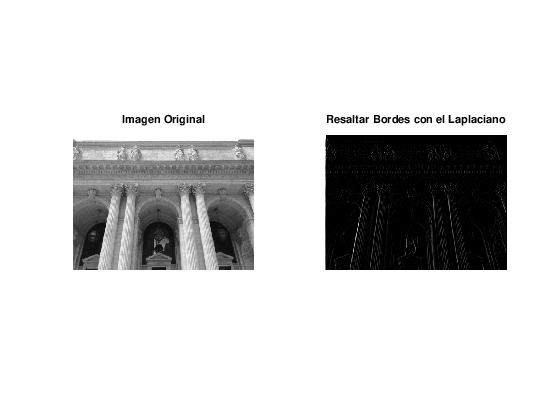

In [4]:
%Filtro de Diferencia Direccional

pkg load image

A = imread("images/Columnas.jpg");
subplot(1,2,1)
imshow(A)
title("Imagen Original")

%Calcular diferencia direccional
% B = [0 1 0; 0 0 0; 0 -1 0]; %Vertical
B = [0 0 0; 1 0 -1; 0 0 0]; %Horizontal
% B = [1 0 0; 0 0 0; 0 0 -1]; %Diagonal
% B = [0 0 -1; 0 0 0; 1 0 0]; %Diagonal 2

A = double(A);

%Realizar la convolucion
C = conv2(A,B,'same'); %Detectar los bordes de la imagen A
C = uint8(C);

%mostrar el laplaciano
subplot(1,2,2)
imshow(C)
title("Resaltar Bordes con diferencia direccional")

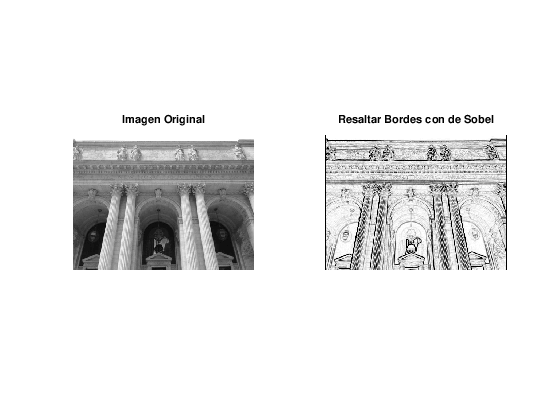

In [11]:
%Operador de Sobel

pkg load image

A = imread("images/Columnas.jpg");
subplot(1,2,1)
imshow(A)
title("Imagen Original")

%Calcular mascaras del operador deSobel

Bx = [-1 -2 -1; 0 0 0; 1 2 1]; %Mascara eje x
By = [-1 0 1; -2 0 2; -1 0 1]; %mascara eje y
A = double(A);

%Realizar la convolucion
Ax=conv2(A,Bx,'same');
Ay=conv2(A,By,'same');
C= sqrt(Ax.^2 + Ay.^2);
C=uint8(-C+255);

%mostrar resultado
subplot(1,2,2)
imshow(C)
title("Resaltar Bordes con de Sobel")

Enfatizar bordes de una imagen borrosa

Tarea: Condiere la imagen "animal.jpg"
1. Usando un filtro pasobajo, obtenga una imagen borrosa de la iamgen "animal.jpg"
2. Usando la tecnica vista anteriormente, enfatice los bordes de dicah imagen. Seleccione un valor de alfa adecuado.